In [1]:
# ==========================================
# STEP 1: INSTALL DEPENDENCIES
# ==========================================
!pip install ultralytics roboflow

import os
from ultralytics import YOLO
from roboflow import Roboflow
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with

In [2]:
# ==========================================
# STEP 2: DOWNLOAD DATASET
# ==========================================
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="b0k73XAJop86dapQsJm0")
project = rf.workspace("mohamed-pfy7o").project("drowsinessdetectionyolov8-test2-dtfwk")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DrowsinessDetectionYolov8-Test2-1 in yolov8:: 100%|██████████| 5740/5740 [00:01<00:00, 4294.73it/s]


In [3]:
# ==========================================
# STEP 3: TRAIN THE MODEL
# ==========================================
# Load the standard YOLOv8 nano model
model = YOLO('yolov8n.pt')

# Train on your specific dataset
# We use dataset.location to automatically find the folder
results = model.train(data=f"{dataset.location}/data.yaml", epochs=20, imgsz=640)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/DrowsinessDetectionYolov8-Test2-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

In [4]:
# ==========================================
# STEP 4: DOWNLOAD THE BEST.PT FILE
# ==========================================
# This looks for the weight file and downloads it to your computer
path_to_model = './runs/detect/train/weights/best.pt'

if os.path.exists(path_to_model):
    print("Training finished. Downloading best.pt now...")
    files.download(path_to_model)
else:
    print(f"Could not find model at {path_to_model}. Check the 'runs' folder in the sidebar.")

Training finished. Downloading best.pt now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

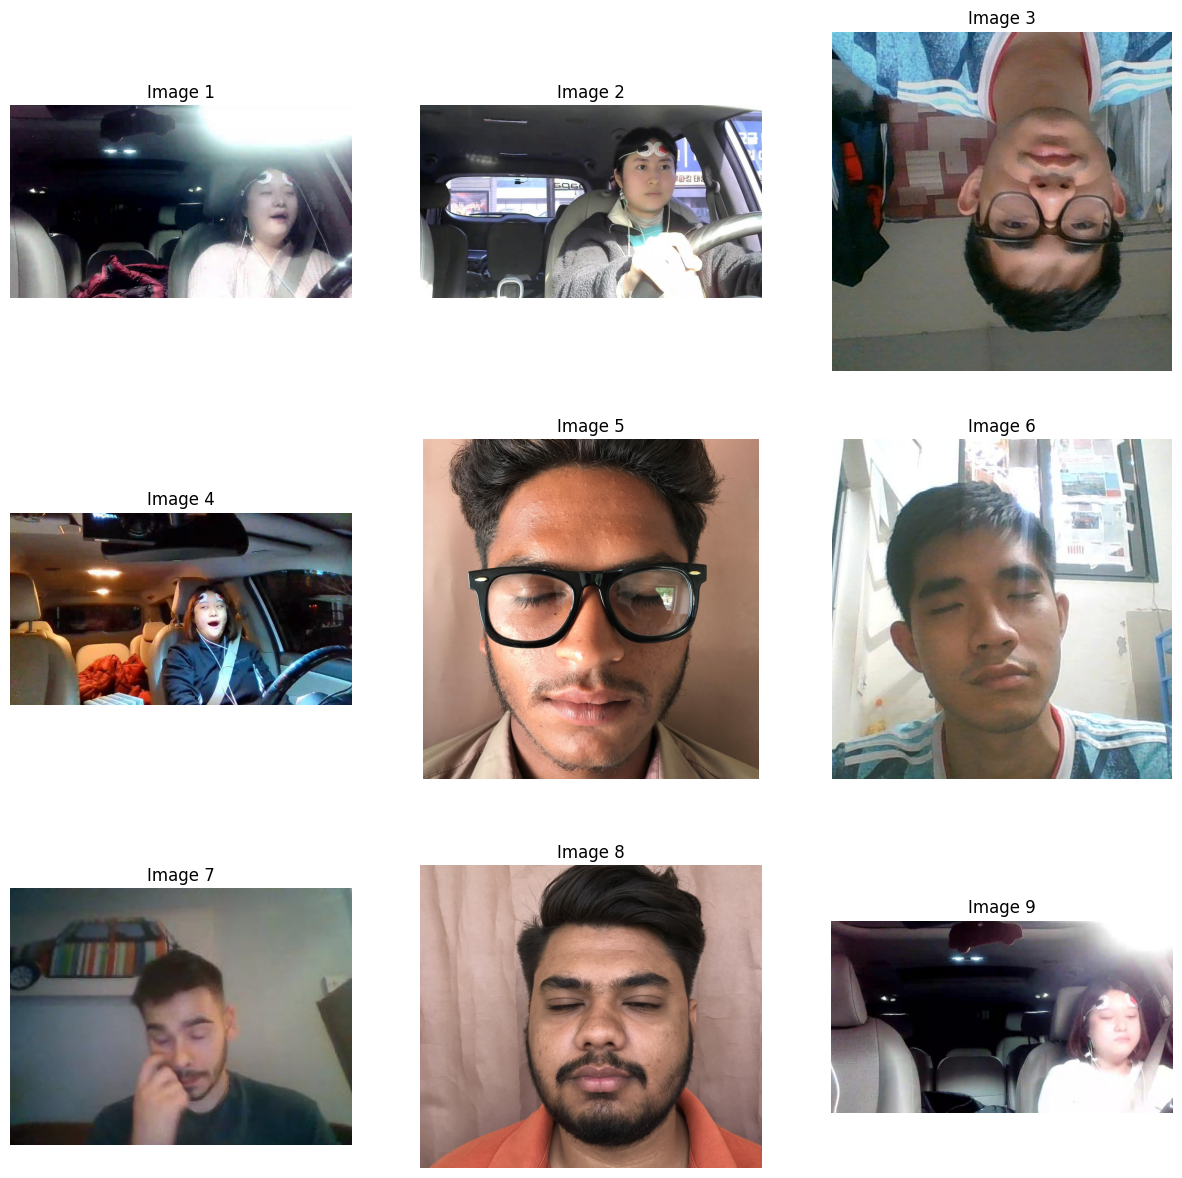

In [5]:
# ==========================================
# STEP 5: VISUALIZE EXAMPLES
# ==========================================
import glob
import random
import cv2
import matplotlib.pyplot as plt

# 1. Find the images
# The dataset is usually downloaded into a folder named after the project
# We look inside the "train/images" folder
image_paths = glob.glob(f"{dataset.location}/train/images/*.jpg")

# If no .jpg found, try .png or .jpeg
if not image_paths:
    image_paths = glob.glob(f"{dataset.location}/train/images/*.png")

# 2. Pick 9 random images
if len(image_paths) > 9:
    random_images = random.sample(image_paths, 9)
else:
    random_images = image_paths

# 3. Display them in a grid
plt.figure(figsize=(15, 15))

for i, img_path in enumerate(random_images):
    # Read the image
    img = cv2.imread(img_path)
    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Optional: Try to find the matching label file to draw boxes (Advanced)
    # This is just a raw view of the image file

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.show()